In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

from jcopml.utils import load_model
from jcopml.plot import plot_roc_curve

import matplotlib.pyplot as plt

In [2]:
df_W1 = pd.read_csv("../dataset/data_2c40d1w.csv") # 1 window dataset
df_W2 = pd.read_csv("../dataset/data_2c40d2w.csv") # 2 window dataset
df_W3 = pd.read_csv("../dataset/data_2c40d3w.csv") # 3 window dataset

In [3]:
labelEncoder = LabelEncoder()

In [4]:
X_1w = df_W1.drop(columns="label")
X_2w = df_W2.drop(columns="label")
X_3w = df_W3.drop(columns="label")

y_1w = df_W1.label
y_2w = df_W2.label
y_3w = df_W3.label

y_1w = labelEncoder.fit_transform(y_1w) 
y_2w = labelEncoder.fit_transform(y_2w)
y_3w = labelEncoder.fit_transform(y_3w)

X_train_1w, X_test_1w, y_train_1w, y_test_1w = train_test_split(X_1w, y_1w, test_size=0.2, stratify=y_1w, random_state=42)
X_train_2w, X_test_2w, y_train_2w, y_test_2w = train_test_split(X_2w, y_2w, test_size=0.2, stratify=y_2w, random_state=42)
X_train_3w, X_test_3w, y_train_3w, y_test_3w = train_test_split(X_3w, y_3w, test_size=0.2, stratify=y_3w, random_state=42)

In [5]:
model_svm_linear_1w = load_model("../model/svm_linear_1w.pkl")
model_svm_linear_2w = load_model("../model/svm_linear_2w.pkl")
model_svm_linear_3w = load_model("../model/svm_linear_3w.pkl")

model_svm_rbf_1w = load_model("../model/svm_rbf_1w.pkl")
model_svm_rbf_2w = load_model("../model/svm_rbf_2w.pkl")
model_svm_rbf_3w = load_model("../model/svm_rbf_3w.pkl")

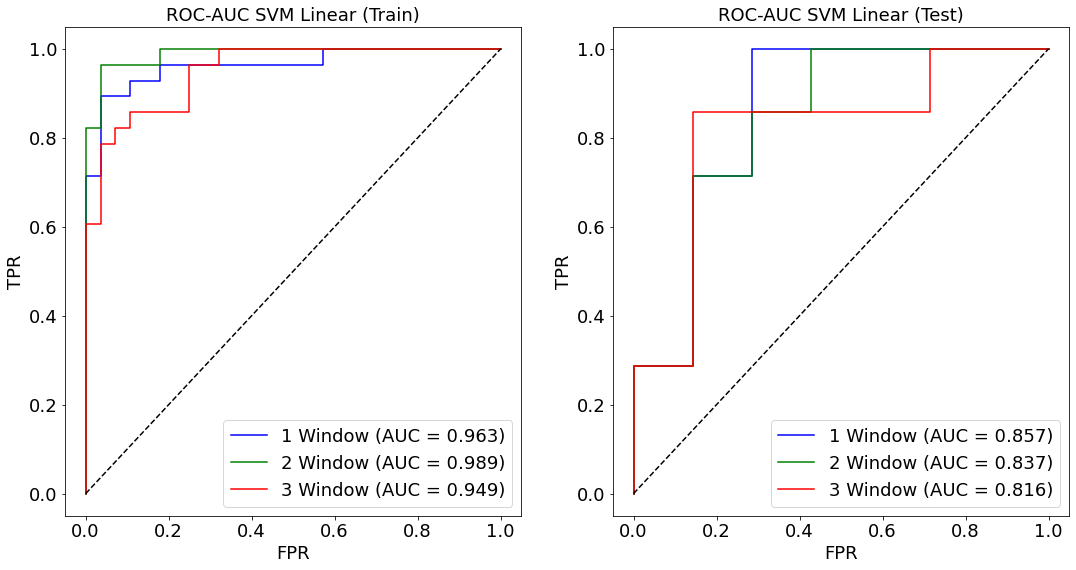

In [14]:
plt.figure(figsize=(18, 9))
plt.subplot(121)
y_predict_1w = model_svm_linear_1w.predict_proba(X_train_1w)[:, 1]
y_predict_2w = model_svm_linear_2w.predict_proba(X_train_2w)[:, 1]
y_predict_3w = model_svm_linear_3w.predict_proba(X_train_3w)[:, 1]

fpr_1w, tpr_1w, _ = roc_curve(y_train_1w, y_predict_1w)
fpr_2w, tpr_2w, _ = roc_curve(y_train_2w, y_predict_2w)
fpr_3w, tpr_3w, _ = roc_curve(y_train_3w, y_predict_3w)

plt.plot(fpr_1w, tpr_1w, 'b-', label=f'1 Window (AUC = {auc(fpr_1w, tpr_1w):.3f})')
plt.plot(fpr_2w, tpr_2w, 'g-', label=f'2 Window (AUC = {auc(fpr_2w, tpr_2w):.3f})')
plt.plot(fpr_3w, tpr_3w, 'r-', label=f'3 Window (AUC = {auc(fpr_3w, tpr_3w):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("FPR", fontsize=18)
plt.ylabel("TPR", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc="lower right", fontsize=18)
plt.title("ROC-AUC SVM Linear (Train)", fontsize=18)

plt.subplot(122)
y_predict_1w = model_svm_linear_1w.predict_proba(X_test_1w)[:, 1]
y_predict_2w = model_svm_linear_2w.predict_proba(X_test_2w)[:, 1]
y_predict_3w = model_svm_linear_3w.predict_proba(X_test_3w)[:, 1]

fpr_1w, tpr_1w, _ = roc_curve(y_test_1w, y_predict_1w)
fpr_2w, tpr_2w, _ = roc_curve(y_test_2w, y_predict_2w)
fpr_3w, tpr_3w, _ = roc_curve(y_test_3w, y_predict_3w)

plt.plot(fpr_1w, tpr_1w, 'b-', label=f'1 Window (AUC = {auc(fpr_1w, tpr_1w):.3f})')
plt.plot(fpr_2w, tpr_2w, 'g-', label=f'2 Window (AUC = {auc(fpr_2w, tpr_2w):.3f})')
plt.plot(fpr_3w, tpr_3w, 'r-', label=f'3 Window (AUC = {auc(fpr_3w, tpr_3w):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
# plt.title(f"Test ROC_AUC: {auc(fpr, tpr):.3f}", fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("FPR", fontsize=18)
plt.ylabel("TPR", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc="lower right", fontsize=18)
plt.title("ROC-AUC SVM Linear (Test)", fontsize=18)
plt.savefig("../Exp/ROC-AUC SVM Linear.png", dpi=300)

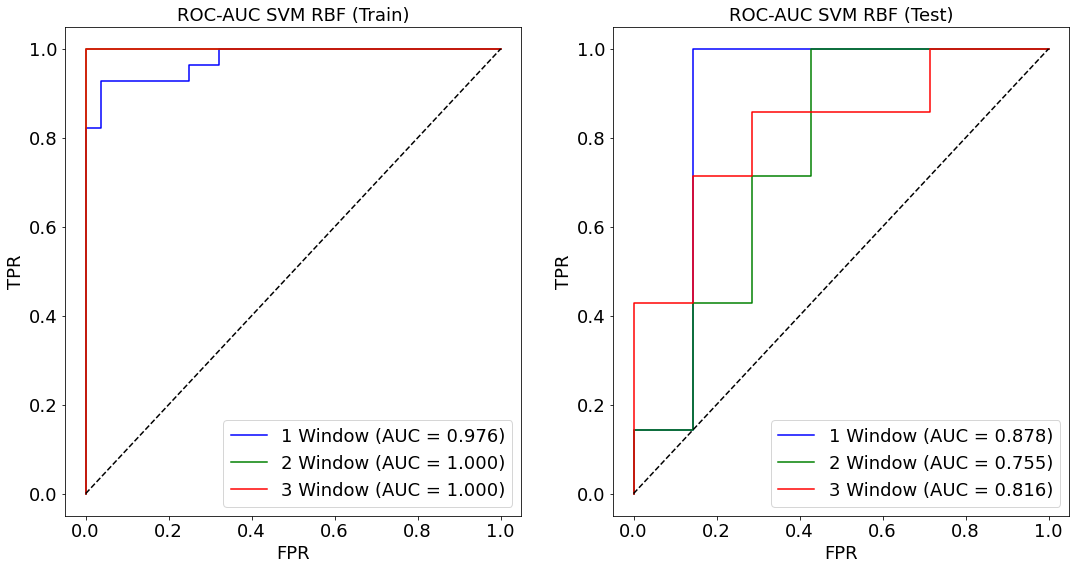

In [15]:
plt.figure(figsize=(18, 9))
plt.subplot(121)
y_predict_1w = model_svm_rbf_1w.predict_proba(X_train_1w)[:, 1]
y_predict_2w = model_svm_rbf_2w.predict_proba(X_train_2w)[:, 1]
y_predict_3w = model_svm_rbf_3w.predict_proba(X_train_3w)[:, 1]

fpr_1w, tpr_1w, _ = roc_curve(y_train_1w, y_predict_1w)
fpr_2w, tpr_2w, _ = roc_curve(y_train_2w, y_predict_2w)
fpr_3w, tpr_3w, _ = roc_curve(y_train_3w, y_predict_3w)

plt.plot(fpr_1w, tpr_1w, 'b-', label=f'1 Window (AUC = {auc(fpr_1w, tpr_1w):.3f})')
plt.plot(fpr_2w, tpr_2w, 'g-', label=f'2 Window (AUC = {auc(fpr_2w, tpr_2w):.3f})')
plt.plot(fpr_3w, tpr_3w, 'r-', label=f'3 Window (AUC = {auc(fpr_3w, tpr_3w):.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("FPR", fontsize=18)
plt.ylabel("TPR", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc="lower right", fontsize=18)
plt.title("ROC-AUC SVM RBF (Train)", fontsize=18)

plt.subplot(122)
y_predict_1w = model_svm_rbf_1w.predict_proba(X_test_1w)[:, 1]
y_predict_2w = model_svm_rbf_2w.predict_proba(X_test_2w)[:, 1]
y_predict_3w = model_svm_rbf_3w.predict_proba(X_test_3w)[:, 1]

fpr_1w, tpr_1w, _ = roc_curve(y_test_1w, y_predict_1w)
fpr_2w, tpr_2w, _ = roc_curve(y_test_2w, y_predict_2w)
fpr_3w, tpr_3w, _ = roc_curve(y_test_3w, y_predict_3w)

plt.plot(fpr_1w, tpr_1w, 'b-', label=f'1 Window (AUC = {auc(fpr_1w, tpr_1w):.3f})')
plt.plot(fpr_2w, tpr_2w, 'g-', label=f'2 Window (AUC = {auc(fpr_2w, tpr_2w):.3f})')
plt.plot(fpr_3w, tpr_3w, 'r-', label=f'3 Window (AUC = {auc(fpr_3w, tpr_3w):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
# plt.title(f"Test ROC_AUC: {auc(fpr, tpr):.3f}", fontsize=14)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel("FPR", fontsize=18)
plt.ylabel("TPR", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(loc="lower right", fontsize=18)
plt.title("ROC-AUC SVM RBF (Test)", fontsize=18)
plt.savefig("../Exp/ROC-AUC SVM RBF.png", dpi=300)